In [8]:
#imports
import numpy as np
import pandas as pd
from acquire import wrangle_zillow
from prepare import prep_zillow
from prepare import remove_outliers
from prepare import tts_con

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get data from SQL server
zillow=wrangle_zillow()

In [3]:
#raw data
zillow.head()

,bath_count,bed_count,property_value,finished_sq_ft,latitude,longitude
0,3.0,4.0,1609238.0,3551.0,34046607.0,-117862608.0
1,3.0,4.0,106406.0,2519.0,34221128.0,-118644081.0
2,2.0,3.0,369853.0,1285.0,33990681.0,-118115568.0
3,1.0,3.0,65848.0,1254.0,33847341.0,-118104378.0
4,2.0,3.0,89362.0,1988.0,33765269.0,-117848358.0


In [4]:
#checking info of raw data
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52358 entries, 0 to 52357
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath_count      52358 non-null  float64
 1   bed_count       52358 non-null  float64
 2   property_value  52358 non-null  float64
 3   finished_sq_ft  52358 non-null  float64
 4   latitude        52358 non-null  float64
 5   longitude       52358 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


In [5]:
#removing longitude and latitude
zillow=prep_zillow(zillow)
zillow.head()

,bath_count,bed_count,property_value,finished_sq_ft
0,3.0,4.0,1609238.0,3551.0
1,3.0,4.0,106406.0,2519.0
2,2.0,3.0,369853.0,1285.0
3,1.0,3.0,65848.0,1254.0
4,2.0,3.0,89362.0,1988.0


In [6]:
#removing the outliers and getting the fences
zillow, fences=remove_outliers(zillow)
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46765 entries, 1 to 52357
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath_count      46765 non-null  float64
 1   bed_count       46765 non-null  float64
 2   property_value  46765 non-null  float64
 3   finished_sq_ft  46765 non-null  float64
dtypes: float64(4)
memory usage: 1.8 MB


In [7]:
#fences for outliers
fences

,bath_count,bed_count,property_value,finished_sq_ft
upper_fence,4.5,5.5,1255866.75,3863.0
lower_fence,0.5,1.5,-443689.25,-289.0


In [20]:
#function to preview graphs for each feature
def feature_graphs():
    for col in zillow:
        print(col)
        ax = sns.histplot(x=col, data=zillow, kde=True)
        ax.lines[0].set_color('crimson')
        plt.show()

bath_count


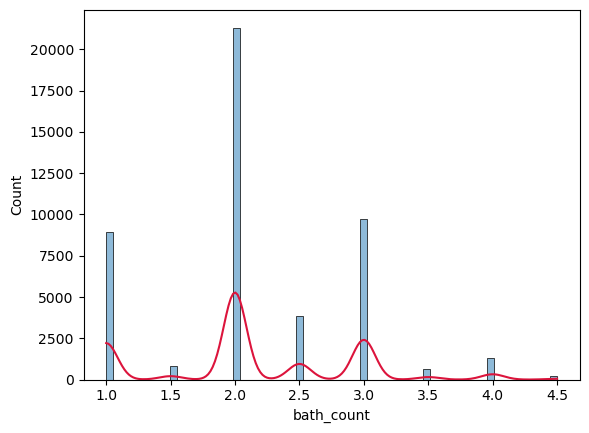

bed_count


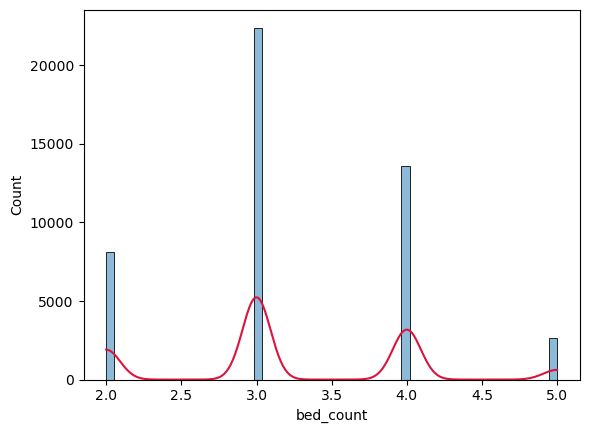

property_value


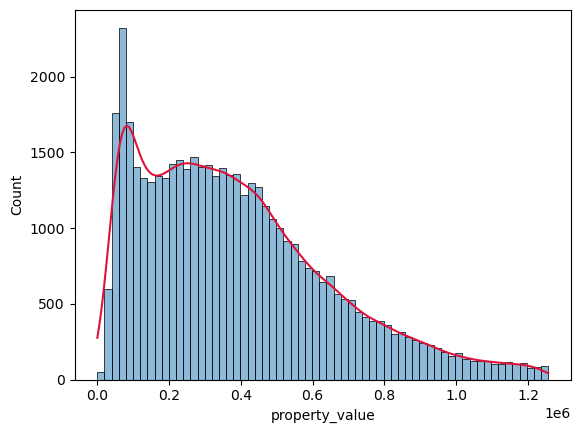

finished_sq_ft


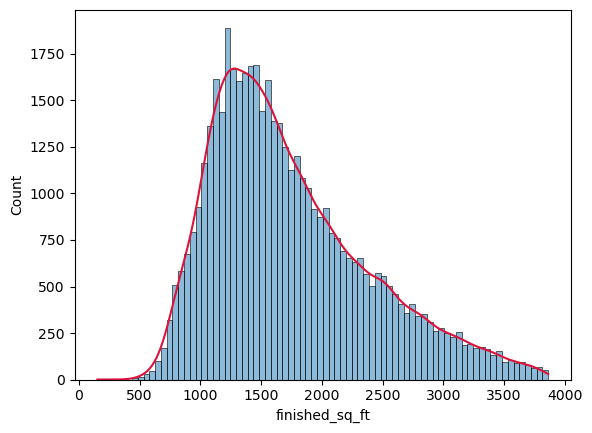

In [21]:
feature_graphs()

**Takeaways**  
* Finished square feet is almost a normal distribution.  
* Can invistigate 2 bath mean against total mean and 3 bedrooms mean against total mean.  
* Investigate bedrooms mean <3 and >3.  
* Coorlation between finished square feet and property value.


## Exploration Question 1:
* Is there a significant difference between the mean property value of homes that have **2 bathrooms** compared to the mean of all homes?
    * $H_0$: There is no difference in between the mean property value of homes that have **2 bathrooms** compared to all homes
    * $H_a$: There is a significant difference between the mean property value of homes that have **2 bathrooms** compared to all homes

## Exploration Question 2:
* Is there a significant difference between the mean property value of homes that have **3 bedrooms** compared to the mean of all homes?
    * $H_0$: There is no difference in between the mean property value of homes that have **3 bedrooms** compared to all homes
    * $H_a$: There is a significant difference between the mean property value of homes that have **3 bedrooms** compared to all homes